<a href="https://colab.research.google.com/github/vasudha-23/Cat-Dog-Classifier--CNN/blob/main/cat%26dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [6]:
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:05<00:00, 212MB/s]
100% 1.06G/1.06G [00:05<00:00, 211MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [9]:
#generators -create batches
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
#normalise
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
#creating CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size =(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [12]:
#summary model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(train_ds, epochs=5, validation_data=validation_ds)

Epoch 1/5
625/625 [==============================] - 525s 838ms/step - loss: 1.1907 - accuracy: 0.6102 - val_loss: 0.6140 - val_accuracy: 0.6684
Epoch 2/5
625/625 [==============================] - 524s 839ms/step - loss: 0.5526 - accuracy: 0.7167 - val_loss: 0.4861 - val_accuracy: 0.7674
Epoch 3/5
625/625 [==============================] - 522s 835ms/step - loss: 0.4785 - accuracy: 0.7728 - val_loss: 0.4833 - val_accuracy: 0.7666
Epoch 4/5
625/625 [==============================] - 530s 848ms/step - loss: 0.4248 - accuracy: 0.8073 - val_loss: 0.5018 - val_accuracy: 0.7546
Epoch 5/5
625/625 [==============================] - 524s 839ms/step - loss: 0.3746 - accuracy: 0.8354 - val_loss: 0.4041 - val_accuracy: 0.8174


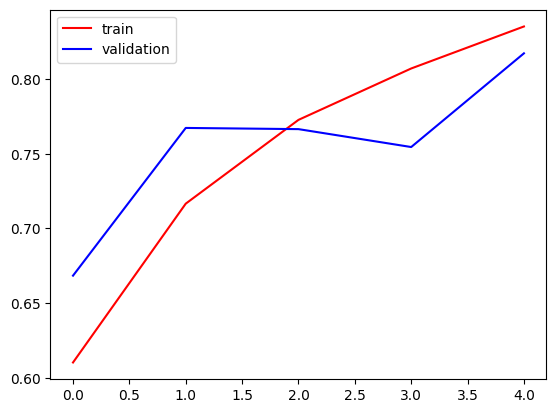

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

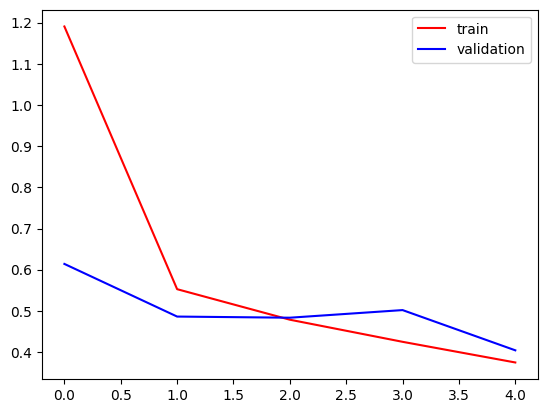

In [16]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
#need to reduces complexity
#add more data
#reducing complexity

In [17]:
import cv2

In [25]:
test_image = cv2.imread('/content/cat.jpg')

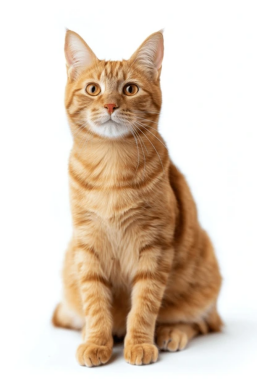

In [26]:

# Check if the image was loaded correctly
if test_image is None:
  print("Error: Image not loaded properly. Check the file path.")
else:
  # Convert BGR to RGB
  test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

  # Display the image using Matplotlib
  plt.imshow(test_image_rgb)
  plt.axis('off')  # Optional: turn off axis labels
  plt.show()

In [27]:
test_image.shape

(600, 400, 3)

In [28]:
test_image = cv2.resize(test_image, (256,256))

In [29]:
test_input = test_image.reshape((1,256,256,3))

In [30]:
model.predict(test_input)

1/1 [==============================] - 0s 139ms/step


array([[0.]], dtype=float32)

Here 0 in the array represents that the image is a CAT, if it was 1 it would represent a DOG respectively.